In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.quantum_info import Operator
import numpy as np
from qiskit.visualization import plot_histogram
print('done!')

done!


In [2]:
# Oracle for target |00111110> in the 8-qubit searching case
oracle_matrix = np.identity(2**8)
oracle_matrix[62, 62] = -1

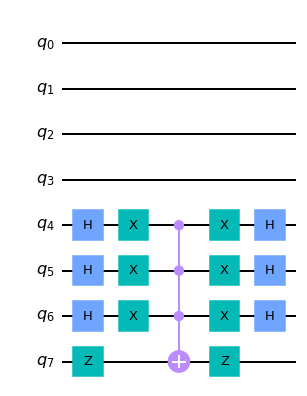

In [10]:
# local diffuser
localdiffuser = QuantumCircuit(8)
localdiffuser.h(4)
localdiffuser.x(4)
localdiffuser.h(5)
localdiffuser.x(5)
localdiffuser.h(6)
localdiffuser.x(6)
localdiffuser.z(7)
localdiffuser.mcx(list(range(4,7)),7)
localdiffuser.z(7)
localdiffuser.x(4)
localdiffuser.h(4)
localdiffuser.x(5)
localdiffuser.h(5)
localdiffuser.x(6)
localdiffuser.h(6)
localdiffuser.draw('mpl')

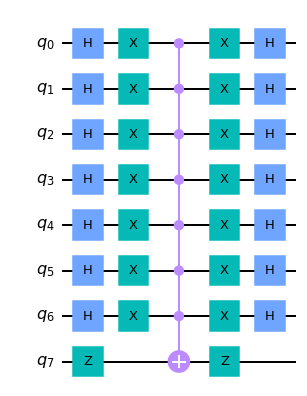

In [16]:
# global diffuser
globaldiffuser = QuantumCircuit(8)
globaldiffuser.h(range(7))
globaldiffuser.x(range(7))  
globaldiffuser.z(7)
globaldiffuser.mct(list(range(7)), 7)  
globaldiffuser.z(7)
globaldiffuser.x(range(7))
globaldiffuser.h(range(7))
globaldiffuser.draw('mpl')

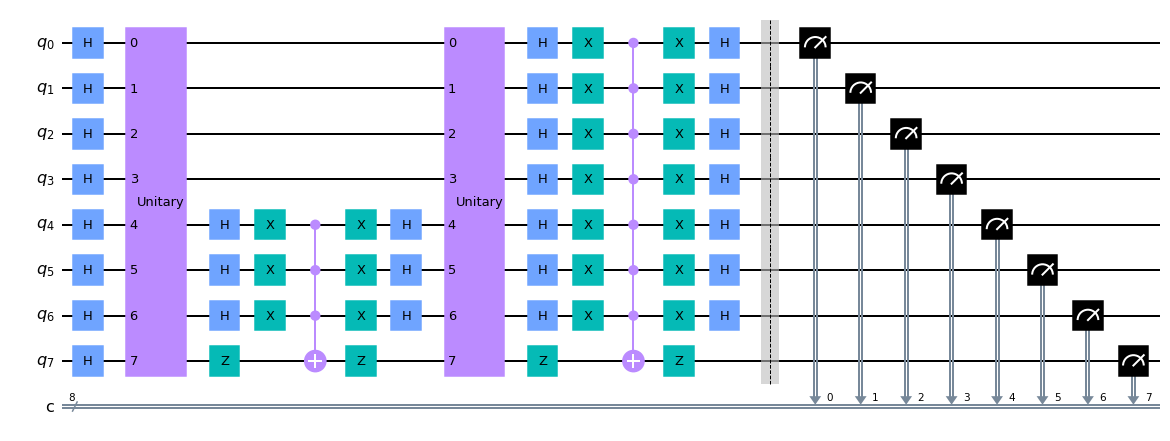

In [17]:
# Performing the 8-qubit GRK quantum search considering its minimum number of iterations without subsystem  
qc = QuantumCircuit(8,8)
qc.h(range(8))
# applying the oracle operator 
qc.unitary(Operator(oracle_matrix), range(8))
# applying the local diffusion operator
qc = qc.compose(localdiffuser)
# applying the oracle operator
qc.unitary(Operator(oracle_matrix), range(8))
# applying the global diffusion operator
qc = qc.compose(globaldiffuser)

qc.barrier()      
qc.measure(range(8),range(8))      

qc.draw('mpl')

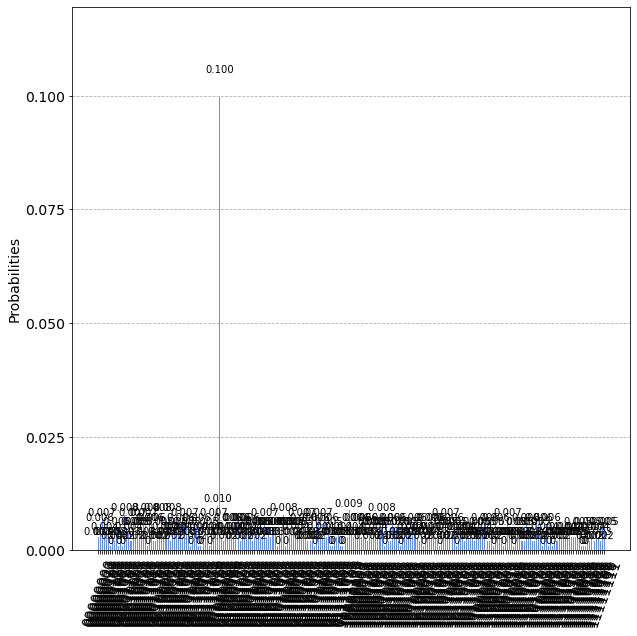

In [20]:
svsim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result()
plot_histogram(result.get_counts(),(10,10))

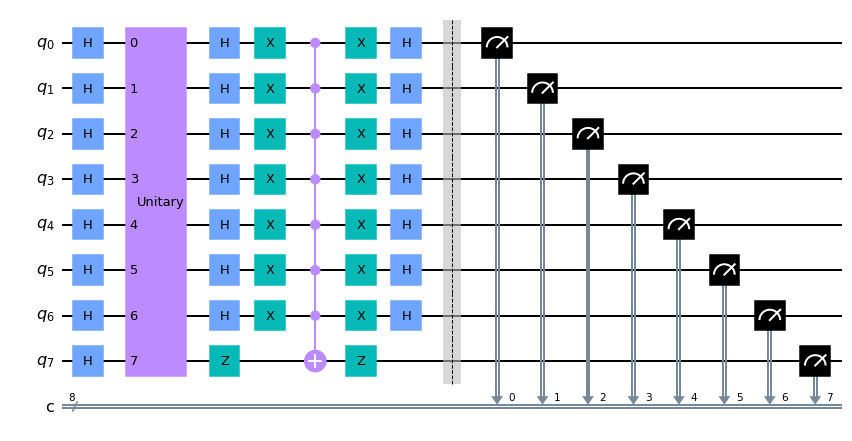

In [22]:
# Performing the 8-qubit Grover quantum search considering its minimum number of iterations without subsystem  
qc1 = QuantumCircuit(8,8)
qc1.h(range(8))
# applying the oracle operator 
qc1.unitary(Operator(oracle_matrix), range(8))
# applying the local diffusion operator
qc1 = qc1.compose(globaldiffuser)
# applying the oracle operator


qc1.barrier()      
qc1.measure(range(8),range(8))      

qc1.draw('mpl')

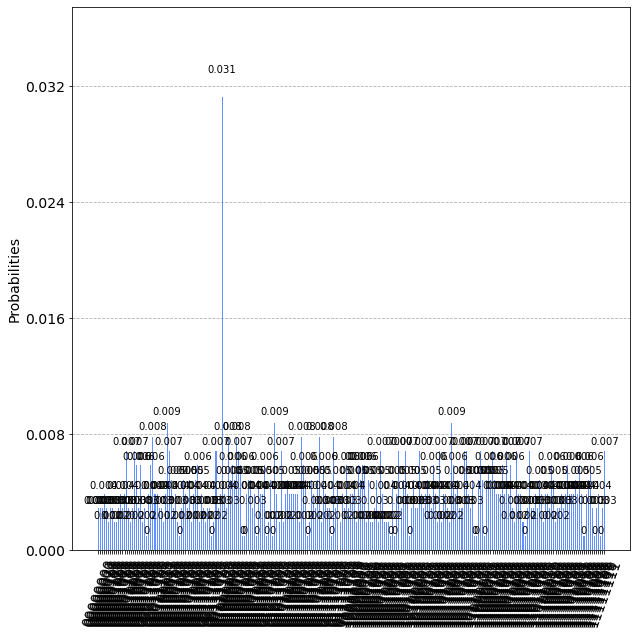

In [23]:
svsim = Aer.get_backend('aer_simulator')
qobj = assemble(qc1)
result = svsim.run(qobj).result()
plot_histogram(result.get_counts(),(10,10))